In [1]:
## Send hardest problems through LLMs

import random
import time
import itertools
import numpy as np
import os
import numpy as np
import json
from tqdm import tqdm
from pysat.solvers import Glucose42, Minicard, Lingeling, Cadical153, Minisat22,MapleChrono, Mergesat3
os.chdir('..')
print(os.getcwd()) # Should be ...\ExploringKSAT

from Code.generators import KSAT_Generator
from Code.solvers import brute_force, dpll
ksg = KSAT_Generator()
#ksg.kcnf_to_cnf(hardest_problem[1]]

C:\Users\shairozs\Documents\Projects\ExploringKSAT


## Importing KSAT Statements
--------

In [2]:
ksg = KSAT_Generator()
samp = r"C:\Users\TEMP\Downloads\aim.tar\aim\aim-50-1_6-no-1.cnf"
samp_clauses = ksg.from_dimacs_file(samp)

 FILE: aim-50-1_6-no-1.nf



 SOURCE: Kazuo Iwama, Eiji Miyano (miyano@su.kyushu-u.a.jp),

          and Yuihi Asahiro



 DESCRIPTION: Artifial instanes from generator by soure.  Generators

              and more information in sat/ontributed/iwama.



 NOTE: Not Satisfiable





In [3]:
samp_clauses[-1]

[-3, -4, -35]

In [13]:
mat = ksg.cnf_to_matrix(samp_clauses).T

Unique variables:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, -14, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -4, -13, -12, -11, -10, -9, -8, -7, -6, -5, -1, -3, -2}
{50: 100, -50: -100, 49: 99, -49: -99, 48: 98, -48: -98, 47: 97, -47: -97, 46: 96, -46: -96, 45: 95, -45: -95, 44: 94, -44: -94, 43: 93, -43: -93, 42: 92, -42: -92, 41: 91, -41: -91, 40: 90, -40: -90, 39: 89, -39: -89, 38: 88, -38: -88, 37: 87, -37: -87, 36: 86, -36: -86, 35: 85, -35: -85, 34: 84, -34: -84, 33: 83, -33: -83, 32: 82, -32: -82, 31: 81, -31: -81, 30: 80, -30: -80, 29: 79, -29: -79, 28: 78, -28: -78, 27: 77, -27: -77, 26: 76, -26: -76, 25: 75, -25: -75, 24: 74, -24: -74, 23: 73, -23: -73, 22: 72, -22: -72, 21: 71, -21: -71, 20: 7

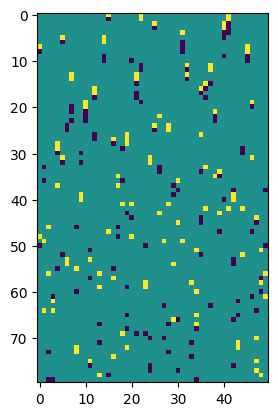

In [14]:
import matplotlib.pyplot as plt
plt.imshow(mat)

In [12]:
np.sum(mat[:, np.where(mat[0,:] == 1)[0]], axis = 1)

array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., -1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [38]:
## For each row
rowscores = {}
for i in range(mat.shape[0]):

    # What variables are positive
    positives = np.where(mat[i, :] == 1)[0]
    
    # How many other statements involve the positive variables
    score = 0
    for p in positives:
        #score += np.sum(np.abs(mat[:, p])) - 1
        score += np.sum(np.clip(mat[:, p], 0, 1)) - 1
    # Assign the row a score
    rowscores[i] = score #+ np.random.rand(0, 1)

In [39]:
rowscores_sorted = {k: v for k, v in sorted(rowscores.items(), key=lambda item: item[1])}

In [40]:
newmat = np.zeros(mat.shape)
i = 0
for k in reversed(list(rowscores_sorted.keys())):
    newmat[i,:] = mat[k,:]
    i += 1

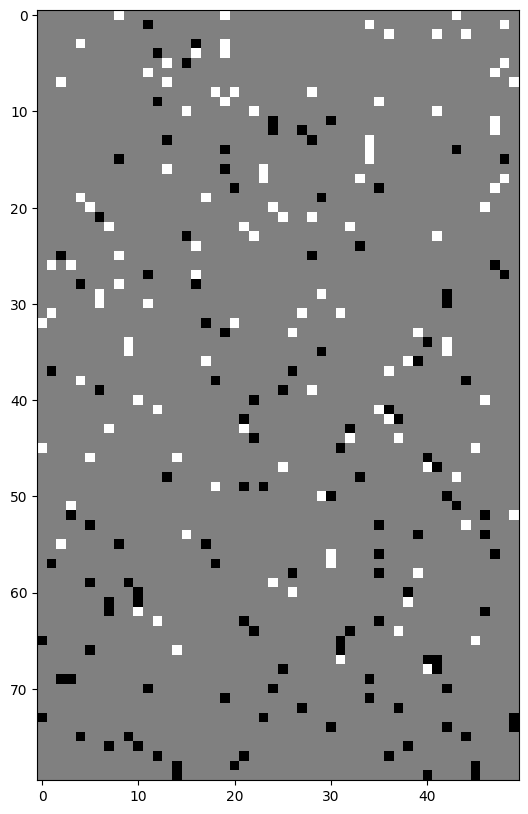

In [44]:
plt.subplots(figsize = (20,10))
plt.imshow(newmat, 'gray')